# K-Nearest Neighbors (KNN):

KNN is often used to classify a new data point into a target class based on the dataset it belongs to. As the name suggests, it is classified according to the **Nearest Neighbor Class**.

In KNN, a specific parameter, **k**, is used to determine the number of neighbors to consider when classifying the new data point. From a mathematical perspective, **k** can be referred to as the **degree of smoothing**. We will cover the significant role of **k** in KNN in the later part.

We will be exploring:
1. KNN Classification - Obtaining discrete values for classification.
2. KNN Regression - When the observable target values are continuous, obtaining a continuous value.
3. KNN Density Estimation (Covered in a later section of the notebook).


## KNN Classification and Regression

In [34]:
import numpy as np
from collections import Counter

def eucliden_distance(v1, v2):
  distance=np.sqrt(np.sum(v1-v2)**2)
  return distance

class KNN:
  def __init__(self, k):
    self.k=k

  def fit(self,x,y):
    self.x_train=x
    self.y_train=y

  def predict(self, X):
    '''Prediction for every test data point'''
    predictions= [self._predict(x) for x in X]
    return predictions

  def _predict(self,x):
    '''Calculate the nearest distance'''
    distance=[eucliden_distance(x, x_train) for x_train in self.x_train]
    k_idxs=np.argsort(distance)[:self.k]
    k_nearest_labels=[self.y_train[idx] for idx in k_idxs]

    # For KNN regression mean of k_nearest_labels is returned
    # return np.mean(k_nearest_labels)

    # For KNN classification most common label is returned returned
    self.y_pred=Counter(k_nearest_labels).most_common()[0][0]
    return self.y_pred

  def accuracy(self , y_pred, y_test):
    return round(np.sum(y_pred==y_test)/len(y_test),2)


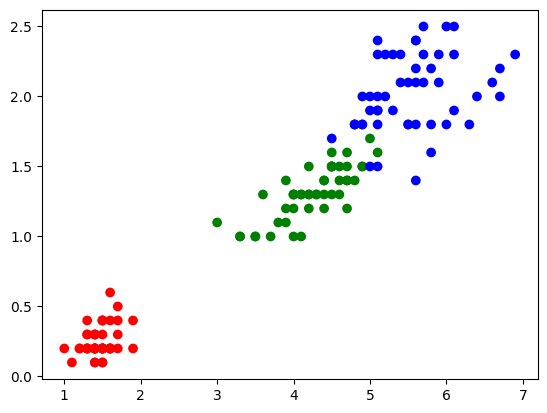

In [35]:
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

iris=datasets.load_iris()
x,y=iris.data, iris.target
x_train, x_test, y_train, y_test, = train_test_split(x,y,test_size=0.2,random_state=42)

plt.scatter(x[:,2], x[:,3], c=y, cmap=ListedColormap(["red","green","blue"]))

In [30]:
knn=KNN(23)
knn.fit(x_train, y_train)
y_pred=knn.predict(x_test)

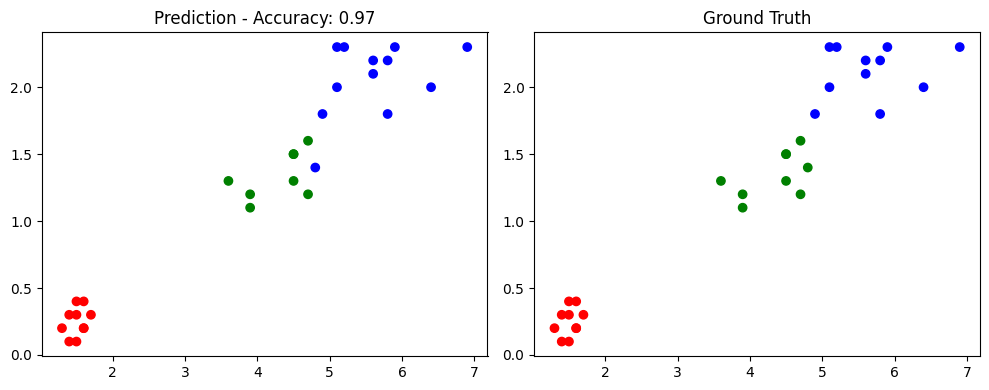

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axes[0].scatter(x_test[:,2], x_test[:,3], c=y_pred, cmap=ListedColormap(["red","green","blue"]))
axes[0].set_title('Prediction - Accuracy: '+str(knn.accuracy(y_pred, y_test)))

axes[1].scatter(x_test[:,2], x_test[:,3], c=y_test, cmap=ListedColormap(["red","green","blue"]))
axes[1].set_title('Ground Truth')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Accuracy')

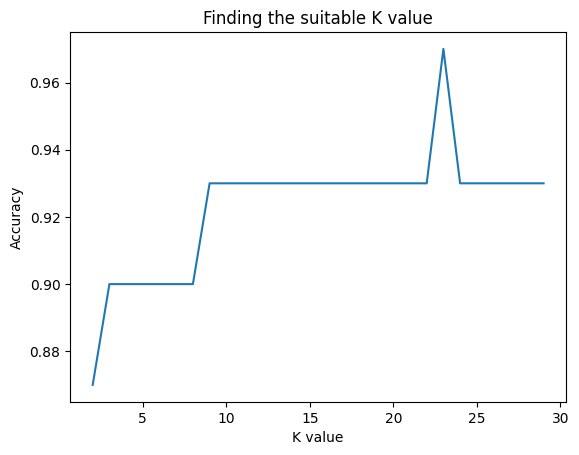

In [32]:
accuracy=[]
for i in range(2,30):
  knn=KNN(i)
  knn.fit(x_train, y_train)
  y_pred=knn.predict(x_test)
  accuracy.append(knn.accuracy(y_pred,y_test))

plt.plot(np.arange(2,30), accuracy)
plt.title("Finding the suitable K value")
plt.xlabel("K value")
plt.ylabel("Accuracy")

From above graph, the suitable k value is 23.

If k < 23 : The degree of smoothness is low giving rise to outliers
If k > 23 : The degree of smoothness high hence creating confusion to the model in classifying.

## KNN Density Estimation

KNN's Density Estimation is non-parametric, which indicates that the density estimation is not dependent on parameters and depends directly on the data points. This indicates that the assumptions are fewer compared to parametric estimation. The only assumption it adopts is that **similar input data points provide similar output data points**.

The non-parametric approach depends on the distance of the given data point to observable data points. In KNN, the density function is given as follows:

```
p(x) = k/(N*V)

where -
  V is the Volume of the sphere covering a radius equal to distance metric between data point and observable data point
  N is the number of observable data points
  k is the KNN parameter

  V(d) = π**d/2 / Γ( d/2 +1) ; For 'd' dimensions
```







In [58]:
class KNN:
  def __init__(self, k):
    self.k=k

  def fit(self,x,y):
    self.x_train=x
    self.y_train=y

  def density(self, X):
      '''Prediction for every test data point'''
      predictions= [self._density(x) for x in X]
      return predictions

  def _density(self,x):
    '''Calculate the nearest distance'''
    distance=[eucliden_distance(x, x_train) for x_train in self.x_train]
    k_idxs=np.argsort(distance)[:self.k]
    k_nearest_distances = [distance[idx] for idx in k_idxs]
    radius = k_nearest_distances[-1]

    d=x.shape[-1]
    n=x.shape[0]
    volume = np.pi**(d / 2) * radius**d / np.math.gamma(d / 2 + 1)

    return self.k / (volume * n)

Text(0, 0.5, 'Probability Desnity')

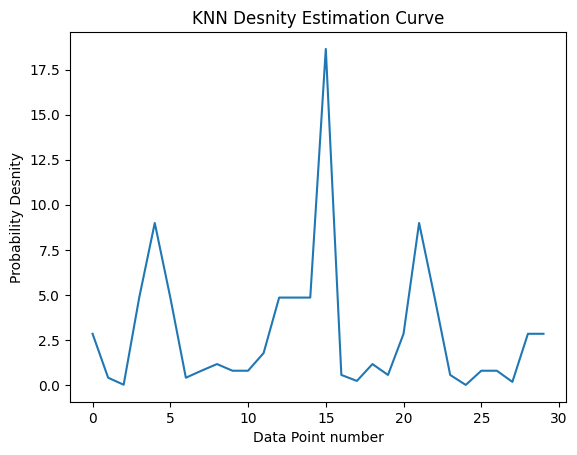

In [71]:
knn=KNN(23)
knn.fit(x_train, y_train)
density=knn.density(x_test)
plt.plot(density)
plt.title("KNN Desnity Estimation Curve")
plt.xlabel("Data Point number")
plt.ylabel("Probability Desnity")

## The Downside of KNN:

1. Just like any non-parametric density estimation, KNN depends on two factors: the k value and distance metrics. In this notebook, we utilized Euclidean distance for the distance metrics. Other metrics such as Hamming distance can also be used, but this may require some trial and error.

2. The choice of k value is crucial. As it represents the smoothness of the model, choosing the wrong value might lead to issues.